In [343]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import rc
from sklearn.cluster import KMeans

In [344]:
# read csv file with Pokemons
df = pd.read_csv("Pokemon.csv")
# get first 10 record from dataset
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [345]:
# define the columns that we'll be use for clastering 
# I get columns with number values only
col = ['HP','Attack','Defense']

In [346]:
# warning exception
pd.options.mode.chained_assignment = None 
# replace data gaps with zeros, otherwise it will give an error
df[col].fillna(0, inplace=True)

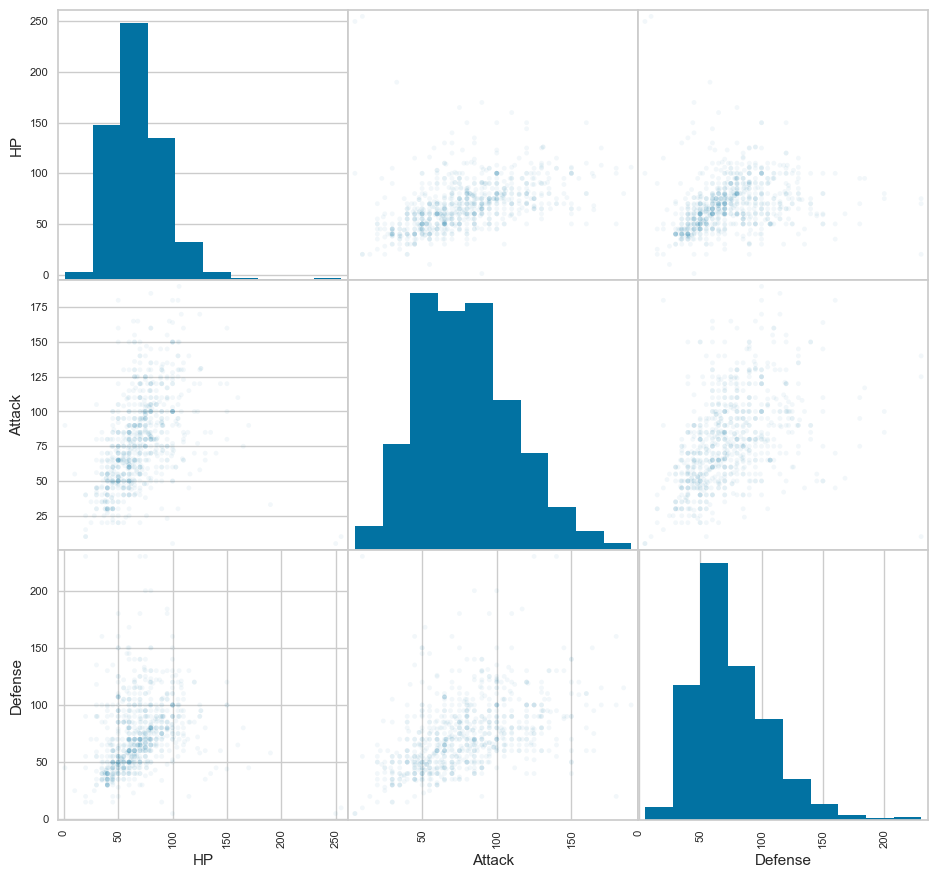

In [347]:
from pandas.plotting import scatter_matrix
# let's create some scatter matrix and histograms
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

In [348]:
# look at pairwise correlations to see 
# relations of the columns values
df[col].corr()

,HP,Attack,Defense
HP,1.000000,0.422386,0.239622
Attack,0.422386,1.000000,0.438687
Defense,0.239622,0.438687,1.000000


In [354]:
# load the data preprocessing library
# this library automatically normalizes data
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [355]:
# Calculate the distances between each data set,
# Euclidean distance is calculated (by default)
# data_dist = pdist(dataNorm, 'euclidean')

# Combining elements into clusters and saving to
# special variable (used below to render
# and allocate the number of clusters
# data_linkage = linkage(data_dist, method='average')

In [356]:
# Elbow method to find number of clusters
Sum_of_squared_distances = []
# possible range is from 1 to 10 clasters
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataNorm)
    Sum_of_squared_distances.append(km.inertia_)

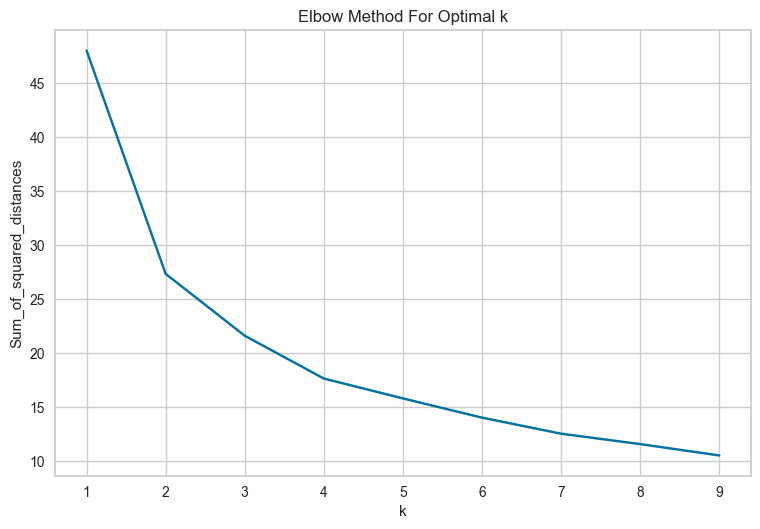

In [357]:
# plotting
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [358]:
# number of clusters
nClust=2

In [359]:
# build clustering using KMeans method
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [360]:
# output the resulting distribution over clusters
# also the number of the cluster to which the line belongs, 
# since the numbering starts from zero, we output adding 1
km.labels_ +1

array([2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,

In [361]:
# add cluster numbers to the original data
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['amount']=df.groupby('KMeans').size().values
res

,HP,Attack,Defense,amount
KMeans,,,,
1,82.891738,106.732194,93.575499,351
2,58.601336,57.322940,58.416481,449


In [362]:
df[df['KMeans']==1] # 1 is the number of cluster

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,KMeans
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1


In [363]:
df[df['KMeans']==2] # 2 is the number of cluster

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,KMeans
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,2
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,2
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False,2
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False,2
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False,2
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False,2


In [364]:
km.cluster_centers_

array([[0.32240842, 0.54990375, 0.39366888],
       [0.22677691, 0.2828267 , 0.23740658]])

In [366]:
y_kmeans = km.predict(dataNorm)

In [367]:
y_kmeans

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [171]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

In [378]:
kmeans = KMeans(n_clusters=2)

# Fit the algorithms to the features
kmeans.fit(dataNorm)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(dataNorm, kmeans.labels_).round(2)


In [379]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(df[col])

dbscan.labels_
dbscan_silhouette = silhouette_score(df[col], dbscan.labels_).round (2)

The silhouette is a measure of how close each point in one cluster is to points in the neighboring clusters

In [380]:
kmeans_silhouette

0.39

In [381]:
dbscan_silhouette

-0.19

These are measures of how similar an object is to its own clusters, and since the best value for silhouette score is 1 and the worst is -1, we can conclude that <b>kmeans_silhouette</b> is better result. It is scalable to a huge data set and also faster to large datasets.